# Boceto para medical analisis

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [47]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Objetivo 1 ejer
Crear un gráfico similar a ejemplos/Figure_1. ng, donde mostramos las cifras de resultados buenos y malos para las variables colesterol, gluc, alco, activo y humo en los pacientes con cardio=1 y cardio=0 en diferentes paneles.

##  Agrega una columna de sobrepeso a los datos. Para determinar si una persona tiene sobrepeso, primero calcule su IMC dividiendo su peso en kilogramos por el cuadrado de su altura en metros. Si ese valor es > 25 entonces la persona tiene sobrepeso. Utilice el valor 0 para NO sobrepeso y el valor 1 para el sobrepeso.

In [56]:
df.tail()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,Sobrepeso
69995,99993,19240,2,1.68,76.0,120,80,1,1,1,0,1,0,26.927438,1
69996,99995,22601,1,1.58,126.0,140,90,2,2,0,0,1,1,50.472681,1
69997,99996,19066,2,1.83,105.0,180,90,3,1,0,1,0,1,31.353579,1
69998,99998,22431,1,1.63,72.0,135,80,1,2,0,0,0,1,27.099251,1
69999,99999,20540,1,1.70,72.0,120,80,2,1,0,0,1,0,24.913495,0


In [48]:
# paso a metros
df.height = df.height / 100



In [49]:
# agrego columna de IMC
df['IMC'] = df.weight / (df.height**2)

In [54]:
# add  col sobrepeso
df['Sobrepeso'] = [1 if k>25 else 0 for k in df.IMC]

## Normaliza los datos haciendo 0 siempre bueno y 1 siempre malo. Si el valor de cholesterol o gluc es 1, haga que el valor 0. Si el valor es mayor que 1, haga el valor 1.

In [60]:
df.cholesterol.unique(), df.gluc.unique()

(array([1, 3, 2]), array([1, 2, 3]))

In [61]:

df['gluc_norm'] = [1 if k==1 else 0 for k in df.gluc]
df['cholesterol_norm'] = [1 if k==1 else 0 for  k in df.cholesterol]

In [62]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,Sobrepeso,gluc_norm,cholesterol_norm
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120,0,1,1
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679,1,1,0
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805,0,1,0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479,1,1,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177,0,1,1


## Convierte los datos en formato largo y crea un gráfico que muestre el recuento de valores de las características categóricas usando catplot() de seaborn. El conjunto de datos debe dividirse por 'Cardio', así que hay un gráfico por cada valor de cardio. El gráfico debería verse como examples/Figure_1.png.a

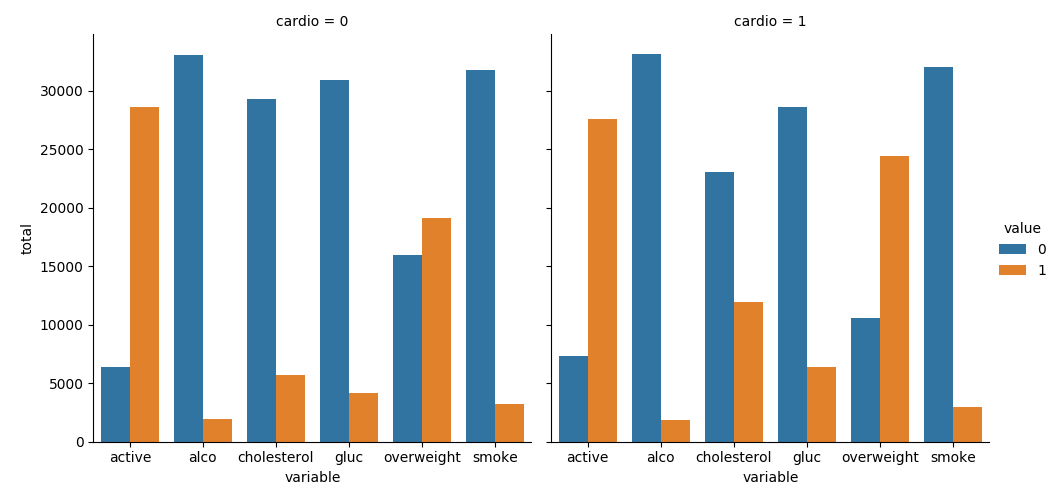

In [12]:
from IPython.display import Image
from IPython.core.display import HTML 
#Image(url= "http://my_site.com/my_picture.jpg")

#Image(url= "http://my_site.com/my_picture.jpg", width=100, height=100)

PATH = '/home/hector/Documentos/freecodecamp/data_analysis_python/Proyecto_data_analisis/medical-data-visualizer/examples/'
Image(filename = PATH + "Figure_1.png") #, width=600, height=10000)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                70000 non-null  int64  
 1   age               70000 non-null  int64  
 2   sex               70000 non-null  int64  
 3   height            70000 non-null  float64
 4   weight            70000 non-null  float64
 5   ap_hi             70000 non-null  int64  
 6   ap_lo             70000 non-null  int64  
 7   cholesterol       70000 non-null  int64  
 8   gluc              70000 non-null  int64  
 9   smoke             70000 non-null  int64  
 10  alco              70000 non-null  int64  
 11  active            70000 non-null  int64  
 12  cardio            70000 non-null  int64  
 13  IMC               70000 non-null  float64
 14  Sobrepeso         70000 non-null  int64  
 15  gluc_norm         70000 non-null  int64  
 16  cholesterol_norm  70000 non-null  int64 

In [94]:
df_cat = pd.melt(df, id_vars=['cardio'],value_vars=['cholesterol_norm', 'gluc_norm', 'smoke', 'alco', 'active','Sobrepeso'])
df_cat

,cardio,variable,value
0,0,cholesterol_norm,1
1,1,cholesterol_norm,0
2,1,cholesterol_norm,0
3,1,cholesterol_norm,1
4,0,cholesterol_norm,1
...,...,...,...
419995,0,Sobrepeso,1
419996,1,Sobrepeso,1
419997,1,Sobrepeso,1
419998,1,Sobrepeso,1


In [109]:
c = pd.DataFrame(df_cat.groupby(['variable', 'value', 'cardio'])['value'].count()).rename(columns={'value':'total'}).reset_index()
c.head()

,variable,value,cardio,total
0,Sobrepeso,0,0,15915
1,Sobrepeso,0,1,10539
2,Sobrepeso,1,0,19106
3,Sobrepeso,1,1,24440
4,active,0,0,6378


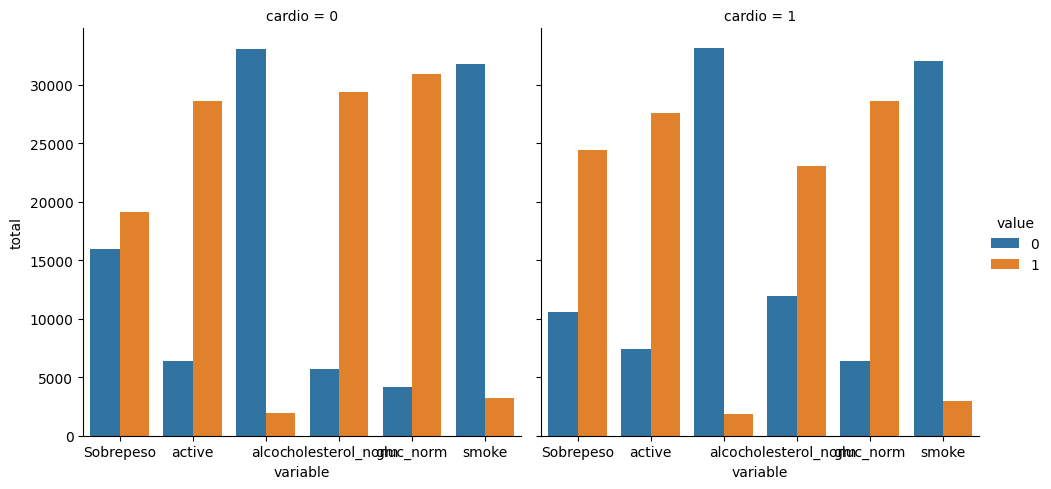

In [112]:
import seaborn as sns 
sns.catplot(data=c, x='variable', y='total', hue='value', kind='bar', col='cardio').fig

In [86]:
df.groupby?

In [ ]:
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the 
    #values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = None


    # Group and reformat the data to split it by 'cardio'. 
    #Show the counts of each feature. You will have to rename one of 
    #the columns for the catplot to work correctly.
    df_cat = None
    

    # Draw the catplot with 'sns.catplot()'



    # Get the figure for the output
    fig = None


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

 # Clean the data
    df_heat = None

    # Calculate the correlation matrix
    corr = None

    # Generate a mask for the upper triangle
    mask = None



    # Set up the matplotlib figure
    fig, ax = None

    # Draw the heatmap with 'sns.heatmap()'



    # Do not modify the next two lines
    fig.savefig('heatmap.png')

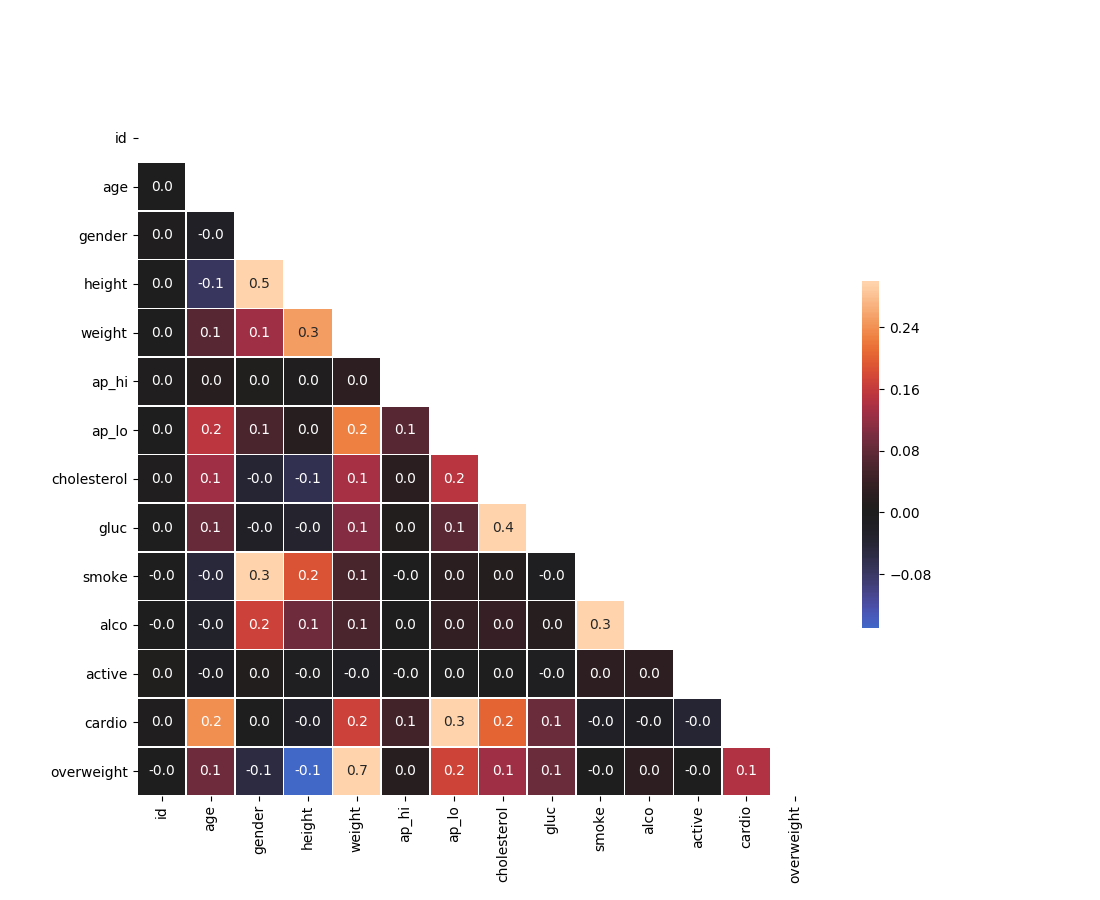

In [114]:
Image(filename = PATH + "Figure_2.png") #, width=600, height=10000)

In [116]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,Sobrepeso,gluc_norm,cholesterol_norm
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,1.643592,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513,0.622086,0.849700,0.748357
std,28851.302323,2467.251667,0.477253,0.082101,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511,0.484870,0.357368,0.433960
min,0.000000,10798.000000,1.000000,0.550000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068,1.000000,1.000000,1.000000
75%,74889.250000,21327.000000,2.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222,1.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,2.500000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667,1.000000,1.000000,1.000000


In [117]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,Sobrepeso,gluc_norm,cholesterol_norm
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120,0,1,1
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679,1,1,0
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805,0,1,0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479,1,1,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177,0,1,1


In [120]:
df_heat = df[ (df.ap_hi <= df.ap_lo) & (df.height <= df.height.quantile(q=0.95))
            & (df.height >= df.height.quantile(q=0.05)) & (df.weight <= df.weight.quantile(q=0.95))
            & (df.weight >= df.weight.quantile(q=0.05)) ]
corr = df_heat.corr()

In [121]:
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,Sobrepeso,gluc_norm,cholesterol_norm
id,1.000000,-0.030942,0.029249,-0.032162,0.044619,0.054333,-0.006803,-3.686720e-03,-0.010892,-1.466046e-02,0.025240,0.018808,-0.002360,0.057930,0.046198,-0.002762,-0.001244
age,-0.030942,1.000000,-0.006473,-0.100240,0.014786,0.100176,0.008737,9.565940e-02,0.100191,-6.376624e-02,-0.102161,-0.013531,0.144966,0.067785,0.043855,-0.083042,-0.076893
sex,0.029249,-0.006473,1.000000,0.529750,0.110795,0.034324,0.008587,1.609834e-03,0.018575,2.952874e-01,0.160321,-0.033611,-0.000922,-0.176677,-0.045999,-0.020877,-0.000714
height,-0.032162,-0.100240,0.529750,1.000000,0.217812,-0.028973,0.004461,-2.309788e-02,-0.041326,1.590629e-01,0.073449,-0.006224,-0.014773,-0.313203,-0.128667,0.040156,0.002535
weight,0.044619,0.014786,0.110795,0.217812,1.000000,0.185432,0.011110,1.751841e-01,0.056992,2.511351e-02,0.064907,-0.003414,0.145418,0.855622,0.659113,-0.086440,-0.173157
ap_hi,0.054333,0.100176,0.034324,-0.028973,0.185432,1.000000,0.354835,1.597707e-01,0.026596,4.316893e-02,0.011488,0.063195,0.349663,0.194139,0.178248,-0.056103,-0.148521
ap_lo,-0.006803,0.008737,0.008587,0.004461,0.011110,0.354835,1.000000,3.255006e-02,0.017943,6.648876e-03,0.028836,0.030230,0.080247,0.008803,0.049997,-0.036984,-0.045303
cholesterol,-0.003687,0.095659,0.001610,-0.023098,0.175184,0.159771,0.032550,1.000000e+00,0.499697,1.115836e-17,0.052900,0.056071,0.136010,0.179688,0.155114,-0.444106,-0.922348
gluc,-0.010892,0.100191,0.018575,-0.041326,0.056992,0.026596,0.017943,4.996968e-01,1.000000,3.923027e-02,0.053184,0.042937,0.007818,0.079800,0.069652,-0.938862,-0.413053
smoke,-0.014660,-0.063766,0.295287,0.159063,0.025114,0.043169,0.006649,1.115836e-17,0.039230,1.000000e+00,0.358569,0.058061,-0.011566,-0.059726,-0.002910,-0.047782,0.003492


In [124]:
mask = np.zeros_like(corr)
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1